In [1]:
import numpy as np
import matplotlib.pyplot as plt
from SUS.linear_model import LinearRegression as lr
from SUS.Model_eval import mse
from SUS.Model_eval import mae
from SUS.preprocessing import test_train_split
from SUS.preprocessing import Minmax
from SUS.preprocessing import test_train_split

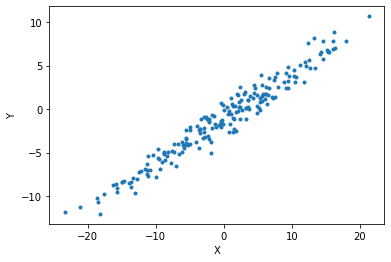

In [2]:
x = 10*np.random.randn( 200)
y = 0.5*x+np.random.normal(-1, 1, 200)
x = x.reshape((len(x),1))
plt.scatter(x,y, marker = '.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Linear Regression.
In order to fit the regression line, we tune the weight parameters. Once optimal parameters are found, usually evaluate results with a mean squared error ($\varepsilon$), and are trying to minimize it.


**Steps.1** Initialized the weights to any random no. Learning rate ($\eta$) controls how much the value of a changes with each step. For good accuracy learning rate should be very small.

Given function, $$y_{pred} = w_0 + w_1 x_1+ w_2 x_2 + \dots + w_{13}x_{13} =  w^T.x_i$$ Where  $w_0, w_1, w_2\dots,w_{13} $ are the weights.

Mean square error($\varepsilon$),$$~~~\varepsilon = \displaystyle\frac{1}{n}\displaystyle\sum_{i=0}^n(y_{pred} - y_i)^2$$

**Steps.2** Calculate the loss function,

So the partial derivative w.r.t to weights (w),$$~~~~~\displaystyle\frac{\partial{\varepsilon}}{\partial{w}}  = \displaystyle\frac{2}{n}\displaystyle\sum_{i=0}^nx_i^T.(y_{pred} - y_i)$$

**Steps.3** Now we update the current value of weights using the following equation:

$$w_i = w_{i-1} -(\eta*\displaystyle\frac{\partial{\varepsilon}}{\partial{w}})$$

**Steps.4** We repeat this process until our loss function is a very small value or ideally ${ \displaystyle\frac{\partial{\varepsilon}}{\partial{w}} \sim 0 }$.

Degree of the polynomial = 2
Weight vector for the given dataset = [-1.04065457  0.51061427]


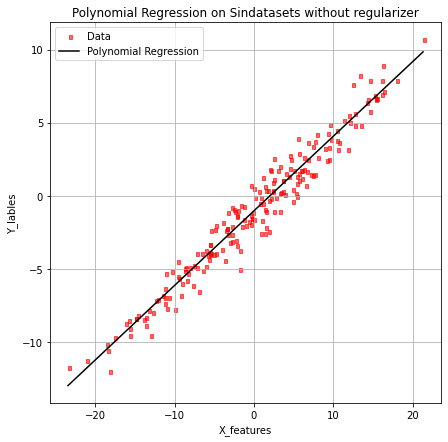

In [3]:
l_reg = lr()
l_reg.fit(x,y)       #train the modle
w = l_reg.w
y_pred = l_reg.predict(x)
print('\033[1m'  + 'Degree of the polynomial = '+str(w.shape[0]))
print('\033[1m'  + 'Weight vector for the given dataset = '+str(w))

#ploting the datasets
fig = plt.figure(figsize=( 7, 7))
plt.scatter(x,y, c="r", alpha=0.6, marker=r'$.$', label='Data')
plt.plot(sorted(x),sorted(y_pred),'-', color ="black", label='Polynomial Regression')
plt.xlabel("X_features")
plt.ylabel("Y_lables")
plt.legend(scatterpoints=1)
plt.grid()
plt.title("Polynomial Regression on Sindatasets without regularizer")
plt.show()

In [4]:
x = 10*np.random.randn( 10000,50)
y = (np.random.randn( 1,50)@x.T+np.random.normal(-1, 1, 10000)).ravel()
print(x.shape,y.shape)
clf = Minmax()
x = clf.fit_transform(x)
Xtest,ytest,Xtrain,ytrain = test_train_split(x,y)

(10000, 50) (10000,)


In [5]:
l_reg = lr()
l_reg.fit(x,y)       #train the modle
w = l_reg.w
y_pred = l_reg.predict(x)
print("Mean Square Error of the model is: "+str(mse(y,y_pred)))
print("Mean Absolute Error of the model is: "+str(mae(y,y_pred)))

Mean Square Error of the model is: 1.0018915851548253
Mean Absolute Error of the model is: 0.7994654890732044


### PCA:
WE KNOW:
$$Var(X) = \frac{1}{n} \sum (X_i - \bar{X})^2$$

$$Cov(X,Y) = \frac{1}{n} \sum (X_i - \bar{X})(Y_i - \bar{Y})^T$$
$$Cov(X,Y) = \frac{1}{n} \sum (X_i - \bar{X})(X_i - \bar{X})^T$$

***Eigen vectors, Eigen values***
1. eigenvectors = max varience
2. eigenvalues = importance of its corresponding eigenvectors
$$A\overrightarrow{v} = \lambda \overrightarrow{v}$$

In [6]:
from SUS.preprocessing import PCA
pca = PCA(10)
pca.fit(Xtrain)
Xtrain = pca.transform(Xtrain)
Xtest = pca.transform(Xtest)
l_reg = lr()
l_reg.fit(x,y)       #train the modle
w = l_reg.w
y_pred = l_reg.predict(x)
print("Mean Square Error of the model is: "+str(mse(y,y_pred)))
print("Mean Absolute Error of the model is: "+str(mae(y,y_pred)))

Mean Square Error of the model is: 1.0018915851548253
Mean Absolute Error of the model is: 0.7994654890732044


# Non Linear Regression:

## Polynomial Regression:

In order to fit the polynomial regression line, we tune the weight parameters. Once optimal parameters are found, usually evaluate results with a mean squared error ($\varepsilon$), and are trying to minimize it.

**Step.1** Converting the feature vector into polynomial basis,$$\phi(x_i) = \displaystyle\sum_{j=0}^d x_i^j=1+ x_i^1+ x_i^2+\dots+x_i^d$$
Where $d$ is the degree of the polynomial basis.


**Step.2** Initialized the weights to any random no. Learning rate ($\eta$) controls how much the value of a changes with each step. For good accuracy learning rate should be very small.

Given function, $$y_{pred} = w_0 + w_1 x_i^1+ w_2 x_i^2 + \dots + w_{d}x_i^{d}$$ Where  $w_0, w_1, w_2\dots,w_{d} $ are the weights.

Mean square error($\varepsilon$),$$~~~\varepsilon = \displaystyle\frac{1}{2n}\displaystyle\sum_{i=0}^n(y_{pred} - y_i)^2+ \displaystyle\frac{\lambda}{2n} ||w||^2$$
In case of without the regulasitation $\lambda =0$

**Step.3** Calculate the loss function,

So the partial derivative w.r.t to weights (w),$$~~~~~\displaystyle\frac{\partial{\varepsilon}}{\partial{w}}  = \displaystyle\frac{1}{n}\displaystyle\sum_{i=0}^nx_i^T.(y_{pred} - y_i)+ \displaystyle\frac{\lambda}{n}* w$$

**Step.4** Now we update the current value of weights using the following equation:

$$w_{i} = w_{i-1} -(\eta*\displaystyle\frac{\partial{\varepsilon}}{\partial{w}})$$

We repeat this process until our loss function is a very small value or ideally ${ \displaystyle\frac{\partial{\varepsilon}}{\partial{w}} \sim 0 }$.

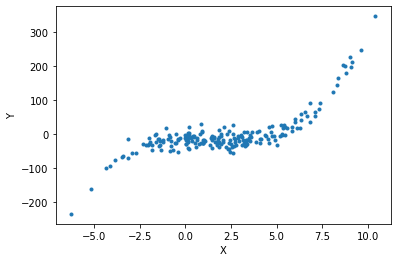

In [7]:
x = 2 - 3 * np.random.normal(0, 1, 200)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-15, 15, 200)
x = x.reshape((len(x),1))
plt.scatter(x,y, marker = '.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Answer1.1.a Without regulazier
Degree of the polynomial = 6
Weight vector for the given dataset = [-1.46833686e+01  4.96569067e-01 -2.16278349e+00  5.55489174e-01
  2.56269049e-04 -2.95664856e-04]


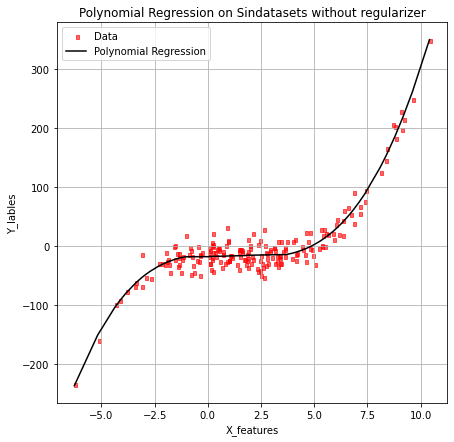

In [8]:
'''Polynomial Regression without regularizer(lambda = 0)'''

p_reg = lr(kernal="polynomial",degree=5)
p_reg.fit(x,y)       #train the modle
w = p_reg.w

y_pred1 = p_reg.predict(x)

print('\033[1m'  + 'Answer1.1.a Without regulazier')
print('\033[1m'  + 'Degree of the polynomial = '+str(w.shape[0]))
print('\033[1m'  + 'Weight vector for the given dataset = '+str(w))

#ploting the datasets
fig = plt.figure(figsize=( 7, 7))
plt.scatter(x,y, c="r", alpha=0.6, marker=r'$.$', label='Data')
plt.plot(sorted(x),sorted(y_pred1),'-', color ="black", label='Polynomial Regression')
plt.xlabel("X_features")
plt.ylabel("Y_lables")
plt.legend(scatterpoints=1)
plt.grid()
plt.title("Polynomial Regression on Sindatasets without regularizer")
plt.show()

### Nonlinear Radial Basis regression:
In order to fit the polynomial regression line, we tune the weight parameters. Once optimal parameters are found, usually evaluate results with a mean squared error ($\varepsilon$), and are trying to minimize it.

**Step.1** Converting the feature vector into polynomial basis,$$\phi(x_i) = \displaystyle\sum_{j=0}^d x_i^j=1+ x_i^1+ x_i^2+\dots+x_i^d$$
Where $d$ is the degree of the polynomial basis.


**Step.2** Initialized the weights to any random no. Learning rate ($\eta$) controls how much the value of a changes with each step. For good accuracy learning rate should be very small.

Given function, $$y_{pred} = w_0 + w_1 x_i^1+ w_2 x_i^2 + \dots + w_{d}x_i^{d}$$ Where  $w_0, w_1, w_2\dots,w_{d} $ are the weights.

Mean square error($\varepsilon$),$$~~~\varepsilon = \displaystyle\frac{1}{2n}\displaystyle\sum_{i=0}^n(y_{pred} - y_i)^2+ \displaystyle\frac{\lambda}{2n} ||w||^2$$
In case of without the regulasitation $\lambda =0$

**Step.3** Calculate the loss function,

So the partial derivative w.r.t to weights (w),$$~~~~~\displaystyle\frac{\partial{\varepsilon}}{\partial{w}}  = \displaystyle\frac{1}{n}\displaystyle\sum_{i=0}^nx_i^T.(y_{pred} - y_i)+ \displaystyle\frac{\lambda}{n}* w$$

**Step.4** Now we update the current value of weights using the following equation:

$$w_{i} = w_{i-1} -(\eta*\displaystyle\frac{\partial{\varepsilon}}{\partial{w}})$$

We repeat this process until our loss function is a very small value or ideally ${ \displaystyle\frac{\partial{\varepsilon}}{\partial{w}} \sim 0 }$.

Answer1.1.a Without regulazier
Degree of the polynomial = 1
Weight vector for the given dataset = [[ 2.98629458e+02 -3.74207832e+05  6.42766898e+06 -6.65485587e+06
   5.78674103e+05 -4.14534267e+03 -6.88709403e+05  1.25236269e+03
   2.40107688e+05  5.50534110e+06 -5.03224060e+06]]


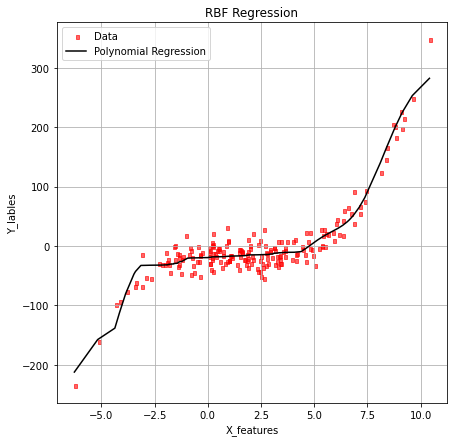

In [9]:
'''RBF Regression without regularizer(lambda = 0)'''

Rbf_reg = lr(kernal="RBF",degree=10,sigma=2)
Rbf_reg.fit(x,y)       #train the modle
w = Rbf_reg.w

y_pred2 = Rbf_reg.predict(x)

print('\033[1m'  + 'Answer1.1.a Without regulazier')
print('\033[1m'  + 'Degree of the polynomial = '+str(w.shape[0]))
print('\033[1m'  + 'Weight vector for the given dataset = '+str(w))

#ploting the datasets
fig = plt.figure(figsize=( 7, 7))
plt.scatter(x,y, c="r", alpha=0.6, marker=r'$.$', label='Data')
plt.plot(sorted(x),sorted(np.ravel(y_pred2)),'-', color ="black", label='Polynomial Regression')
plt.xlabel("X_features")
plt.ylabel("Y_lables")
plt.legend(scatterpoints=1)
plt.grid()
plt.title("RBF Regression")
plt.show()